# <center>Day 1</center>

# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Stats flashcard: https://quizlet.com/43691622/stats-61-63-flash-cards/

In [2]:
import statistics as st

In [3]:
# data = np.random.randint(1,10,(2,10))
np.random.seed(0)
data = np.random.randint(1,10,10)
data 

array([6, 1, 4, 4, 8, 4, 6, 3, 5, 8])

In [4]:
mean = np.mean(data)
median = np.median(data)
mode = st.mode(data)

print(mean,median,mode,sep=",")

4.9,4.5,4


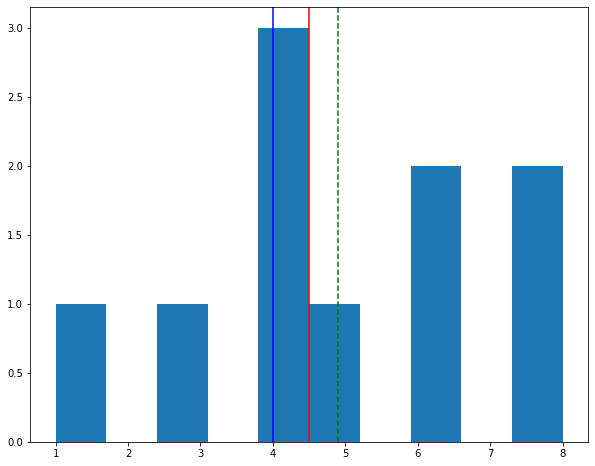

In [5]:
plt.figure(figsize=(10,8))
plt.hist(data)
plt.axvline(mean,color='g',ls='--')
plt.axvline(median,color='r',ls='-')
plt.axvline(mode,color='b')
plt.show()

In [6]:
from os import listdir

print(listdir('../data/'))

['Admission_Predict.csv', 'AirPassengers.csv', 'BlackFriday.csv', 'CCCHURN-Bank Churn.doc', 'CCCHURN.csv', 'cs-training.csv', 'data1.csv', 'data2.csv', 'LoR-Bank-full-TDsubscription.xlsx', 'Melbourne_housing_FULL.csv', 'train04.csv']


In [7]:
df_raw = pd.read_csv('../data/Admission_Predict.csv')
df_raw.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [9]:
# 5 point summary
# axis = 1 is vertical here
df_raw.drop('Serial No.',axis=1,inplace=True)
df_raw.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [10]:
q1 = df_raw.quantile(q=0.25)
q1

GRE Score            308.00
TOEFL Score          103.00
University Rating      2.00
SOP                    2.50
LOR                    3.00
CGPA                   8.17
Research               0.00
Chance of Admit        0.64
Name: 0.25, dtype: float64

In [11]:
q3 = df_raw.quantile(q=0.75)
q3

GRE Score            325.0000
TOEFL Score          112.0000
University Rating      4.0000
SOP                    4.0000
LOR                    4.0000
CGPA                   9.0625
Research               1.0000
Chance of Admit        0.8300
Name: 0.75, dtype: float64

## IQR

In [12]:
q3 - q1

GRE Score            17.0000
TOEFL Score           9.0000
University Rating     2.0000
SOP                   1.5000
LOR                   1.0000
CGPA                  0.8925
Research              1.0000
Chance of Admit       0.1900
dtype: float64

In [13]:
col_gre = 'GRE Score'
fig_size = (10,8)

In [14]:
mode = df_raw[col_gre].mode()
mode

0    312
1    324
dtype: int64

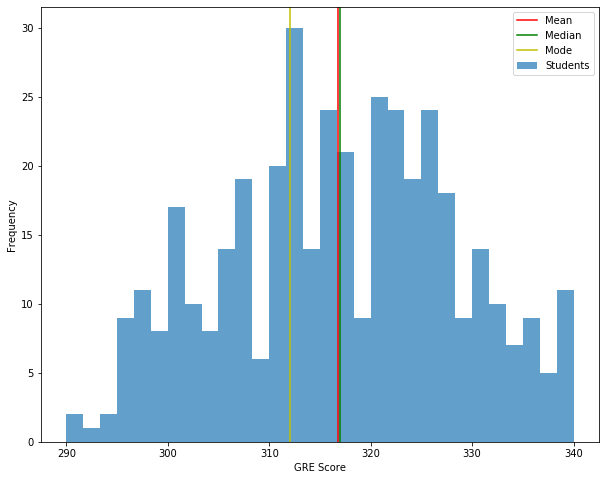

In [15]:
mean = df_raw[col_gre].mean()
median = df_raw[col_gre].median()
mode = df_raw[col_gre].mode()

plt.figure(figsize=(10,8))
plt.hist(df_raw[col_gre],bins=30,alpha=0.7)
plt.axvline(mean,color='r')
plt.axvline(median,color='g')
plt.axvline(mode[0],color='y')
plt.legend(labels=["Mean","Median","Mode","Students"])

plt.xlabel('GRE Score')
plt.ylabel('Frequency')
plt.show()

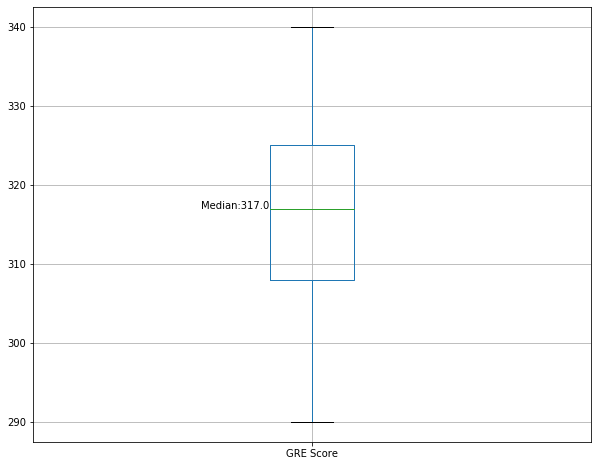

In [16]:
df_raw.boxplot(column=['GRE Score'],figsize=fig_size)
plt.text(x=0.8,y=median,s='Median:'+str(median))
plt.show()

## Range

In [17]:
df_raw.max() - df_raw.min()

GRE Score            50.00
TOEFL Score          28.00
University Rating     4.00
SOP                   4.00
LOR                   4.00
CGPA                  3.12
Research              1.00
Chance of Admit       0.63
dtype: float64

## Correlation 

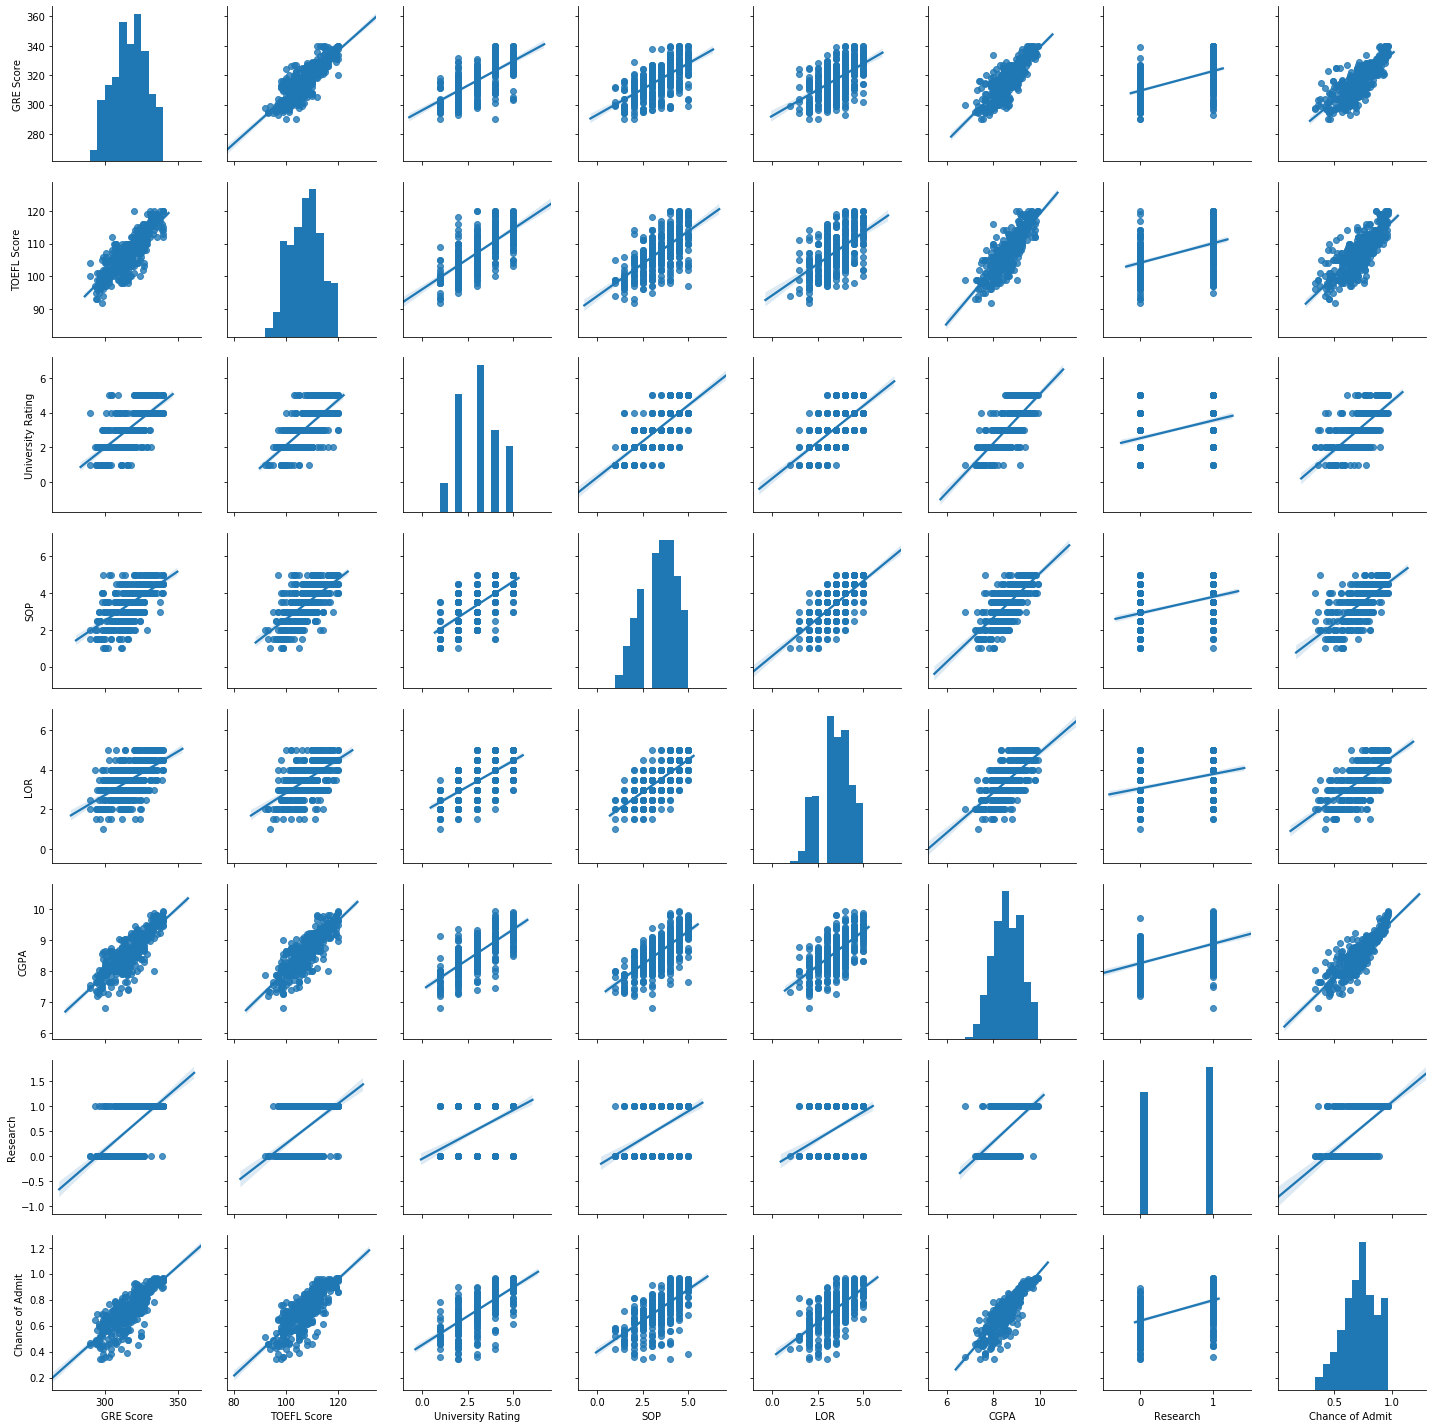

In [18]:
sns.pairplot(df_raw,kind='reg')
plt.show()

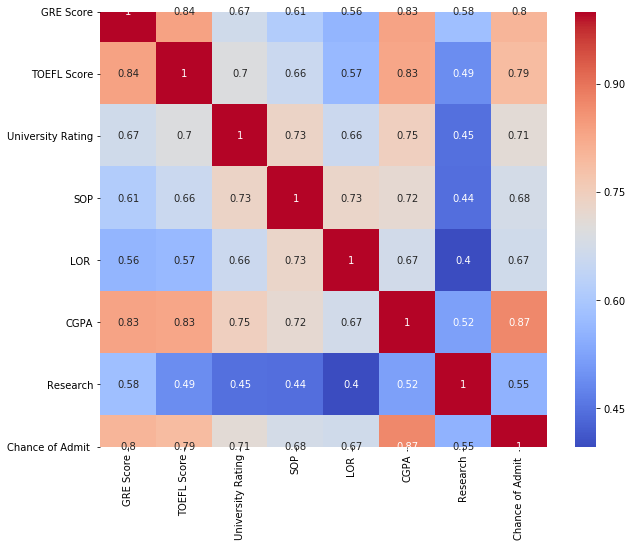

In [19]:
cor = df_raw.corr()
# print(cor)
plt.figure(figsize=fig_size)
sns.heatmap(cor,annot=True,cmap='coolwarm')
# sns.heatmap(cor,annot=True,cmap='magma')
plt.show()

In [20]:
df_raw.skew().sort_values()

Chance of Admit     -0.353448
SOP                 -0.275761
Research            -0.191582
LOR                 -0.106991
CGPA                -0.065991
GRE Score           -0.062893
TOEFL Score          0.057216
University Rating    0.171260
dtype: float64

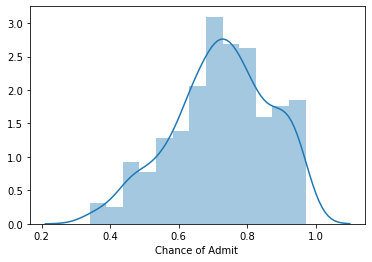

In [21]:
ax = sns.distplot(df_raw["Chance of Admit "])

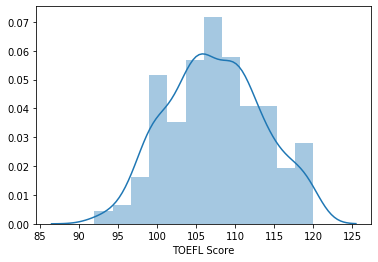

In [22]:
ax = sns.distplot(df_raw["TOEFL Score"])

In [23]:
df_raw.kurtosis().sort_values()

Research            -1.973187
University Rating   -0.796287
GRE Score           -0.700489
SOP                 -0.675610
LOR                 -0.662484
TOEFL Score         -0.578778
CGPA                -0.458476
Chance of Admit     -0.389126
dtype: float64